In [2]:
import numpy as np
import matplotlib as plt
from pylab import *
import random
from scipy.integrate import odeint
from scipy import signal


## Plot trase for a given light stimulus

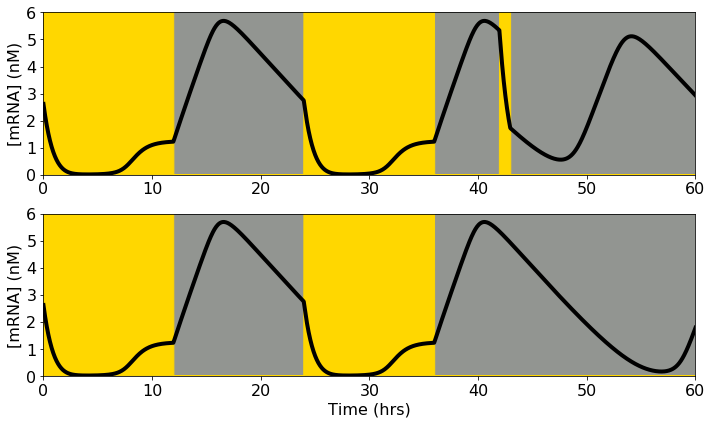

In [4]:
"""
Model of circadian oscillator with entrainment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import pandas as pd
import seaborn as sns


def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h
    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave

def light_off(f, t, end):
    if t>end:
        f=0 
    return f

def add_pulse(f,t,  pulse_start, pulse_duration, amp):
    if (t>pulse_start) & (t< pulse_start + pulse_duration):
        f = amp
    return f
# This function is making an array of light values for plotting
def make_light_array(t, light_period, light_amp, ld_end,  pulse_start, pulse_duration, pulse_amp):
    light = square_wave(t, light_period, light_amp)
    light_ind = int(ld_end/dt)
    light[light_ind :]=0
    pulse_start_ind = int(pulse_start/dt)
    pulse_end_ind = int((pulse_start + pulse_duration)/dt)
    light[pulse_start_ind : pulse_end_ind] = pulse_amp
    return light
            
# solve the system dy/dt = f(y, t)
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

    # mRNA expression hill_down(x, k, n)
    ld = light_off(square_wave(t, light_period, light_amp), t,  pulse_end)
    a = add_pulse(ld, t, pulse_start, pulse_duration, pulse_amp)
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - a*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]


def oscillator_summary():
    vs_list   = [0.8  , 1.2, 1.6   ]
    vs_names  = ['Weak', 'Medium', 'Strong']
    vs_colors = ['b', 'g', 'r']
    df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
    return(df)



# Choose total time of simulation, T
T = 580.
# Chose trainsients time
T_transients = 480
T_plot = T - T_transients

# Chose time step
dt=0.05

#Calculate number of time steps
nsteps=int(T/dt)

# Calculate number of indices in transient part
trans_ind = int(T_transients/dt)

# Create time grid
t  = np.linspace(0, T, nsteps) 


# Choose initial conditions
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.1740351,  3.22519908, 3.13304933]  

# Paramters of the model
vs = 1.6
# For weak, medium and strong oscillators, choose vs=[0.75, 1, 1.25]
#vs = 1.
vm = 0.505
Km = 0.5
KI = 1.0
ks = 0.5
vd = 1.4
Kd = 0.13
k1 = 0.5
k2 = 0.6


#vs_df = oscillator_summary()
light_amp = 0.5
pulse_amp = 0
light_period = 24
ld_end = 516
pulse_start = 522
pulse_end = 523
pulse_duration = 1
#entrain_period = 20

count = int(T_plot/light_period)  # number of light periods in plotting region

plt.figure(figsize=(10,6))      
ax = plt.gca()
ax.set_facecolor('g')
ax.set_facecolor((1.0, 0.47, 0.42))
pulse_list = [1, 0]
subplot = 1
for pulse_amp in pulse_list:
    # Solve ODE and plot mRNA concentraion, M
    soln = odeint(df, y0, t)
    M  = soln[trans_ind:, 0]
    light_plot = make_light_array(t, light_period, light_amp, ld_end,  pulse_start, pulse_duration,  pulse_amp)[trans_ind:]
    time = t[trans_ind:]-t[trans_ind]
    #   sqr = square_wave(time,light_period,2.0)
    plt. subplot(2,1,  subplot)
    plt.plot(time, M, 'k', linewidth = 4)
    ax = plt.gca()
    ax.set_facecolor('xkcd:grey')
    ymax = 10
    plt.fill_between(time, 0, ymax*light_plot/light_amp ,  color = 'gold')
    subplot = subplot+1
    plt.ylim(0,5.5)
    plt.xlim(0,60)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel("[mRNA] (nM)",fontsize=16)
    plt.ylim(0,6)

plt.xlabel("Time (hrs)",fontsize=16)



plt.tight_layout()

In [ ]:
Let's try to make simulation for different time of pulse application

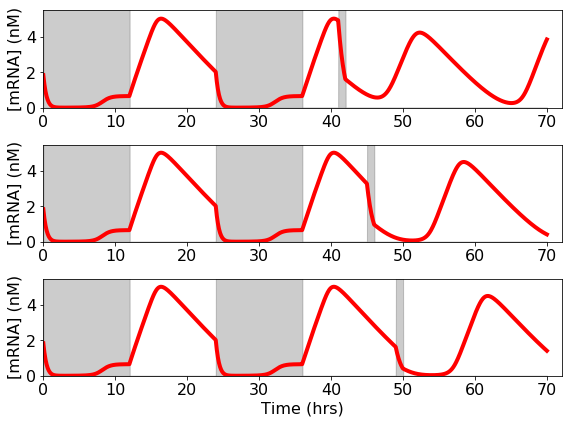

In [113]:
"""
Model of circadian oscillator with entrainment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import pandas as pd
import seaborn as sns


def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h
    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave

def light_off(f, t, end):
    if t>end:
        f=0 
    return f

def add_pulse(f,t,  pulse_start, pulse_duration, amp):
    if (t>pulse_start) & (t< pulse_start + pulse_duration):
        f = amp
    return f

def make_light_array(t, light_period, light_amp, ld_end,  pulse_start, pulse_duration, pulse_amp):
    light = square_wave(t, light_period, light_amp)
    light_ind = int(ld_end/dt)
    light[light_ind :]=0
    pulse_start_ind = int(pulse_start/dt)
    pulse_end_ind = int((pulse_start + pulse_duration)/dt)
    light[pulse_start_ind : pulse_end_ind] = pulse_amp
    return light
            
# solve the system dy/dt = f(y, t)
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

    # mRNA expression hill_down(x, k, n)
    ld = light_off(square_wave(t, light_period, light_amp), t,  pulse_end)
    a = add_pulse(ld, t, pulse_start, pulse_duration, pulse_amp)
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - a*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]


def oscillator_summary():
    vs_list   = [0.8  , 1.2, 1.6   ]
    vs_names  = ['Weak', 'Medium', 'Strong']
    vs_colors = ['b', 'g', 'r']
    df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
    return(df)



# Choose total time of simulation, T
T = 550.
# Chose trainsients time
T_transients = 480
T_plot = T - T_transients

# Chose time step
dt=0.05

#Calculate number of time steps
nsteps=int(T/dt)

# Calculate number of indices in transient part
trans_ind = int(T_transients/dt)

# Create time grid
t  = np.linspace(0, T, nsteps) 


# Choose initial conditions
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.1740351,  3.22519908, 3.13304933]  

# Paramters of the model
vs = 1.6
# For weak, medium and strong oscillators, choose vs=[0.75, 1, 1.25]
#vs = 1.
vm = 0.505
Km = 0.5
KI = 1.0
#ks = 0.3
vd = 1.4
Kd = 0.13
k1 = 0.5
k2 = 0.6


#vs_df = oscillator_summary()
light_amp = 1
pulse_amp = 1
light_period = 24
ld_end = 516
pulse_start = 525
pulse_duration = 1
#entrain_period = 20

count = int(T_plot/light_period)  # number of light periods in plotting region

plt.figure(figsize=(8,6))                                  # used in creating the greyed-out rectangles in graph
pulse_start_list = [521, 525, 529]
subplot = 1
for pulse_start in pulse_start_list:
    # Solve ODE and plot mRNA concentraion, M
    soln = odeint(df, y0, t)
    M  = soln[trans_ind:, 0]
    light_plot = make_light_array(t, light_period, light_amp, ld_end,  pulse_start, pulse_duration,  pulse_amp)[trans_ind:]
    time = t[trans_ind:]-t[trans_ind]
    #   sqr = square_wave(time,light_period,2.0)
    plt. subplot(3,1,  subplot)
    plt.plot(time, M, vs_df.color[vs], linewidth = 4)
    ymax = 10
    #plt.fill_between(time, 0, ymax*light_plot/light_amp,'k', alpha=0.2, edgecolor='k')
    plt.fill_between(time, 0, ymax*light_plot/light_amp, alpha=0.2, color = 'k')
    subplot = subplot+1
    plt.ylim(0,5.5)
    plt.xlim(0,72)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel("[mRNA] (nM)",fontsize=16)
plt.xlabel("Time (hrs)",fontsize=16)




plt.tight_layout()